In [2]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("Sample - Superstore.csv.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,9993,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200


In [6]:
df['Order Date']=pd.to_datetime(df['Order Date'])

In [7]:
ts = df.groupby("Order Date")["Sales"].sum().reset_index()
ts = ts.rename(columns={"Order Date": "ds", "Sales": "y"})
ts.head()

,ds,y
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


# Prophet Model

In [9]:
from prophet import Prophet

In [10]:
import matplotlib.pyplot as plt

In [11]:
model=Prophet()
model.fit(ts)

10:38:13 - cmdstanpy - INFO - Chain [1] start processing
10:38:15 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future=model.make_future_dataframe(periods=180)
forecast=model.predict(future)

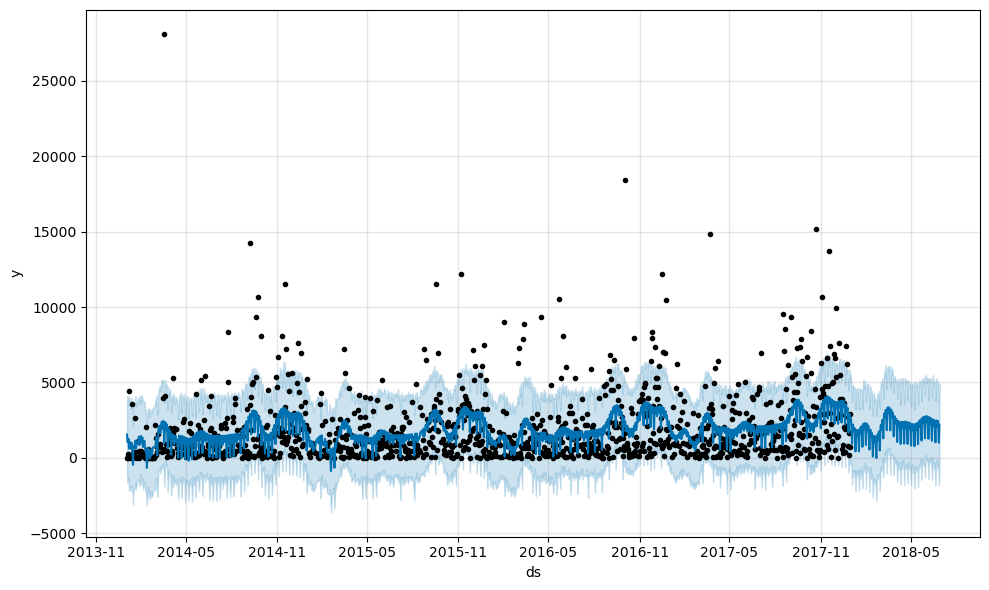

In [13]:
fig1=model.plot(forecast)
plt.show()

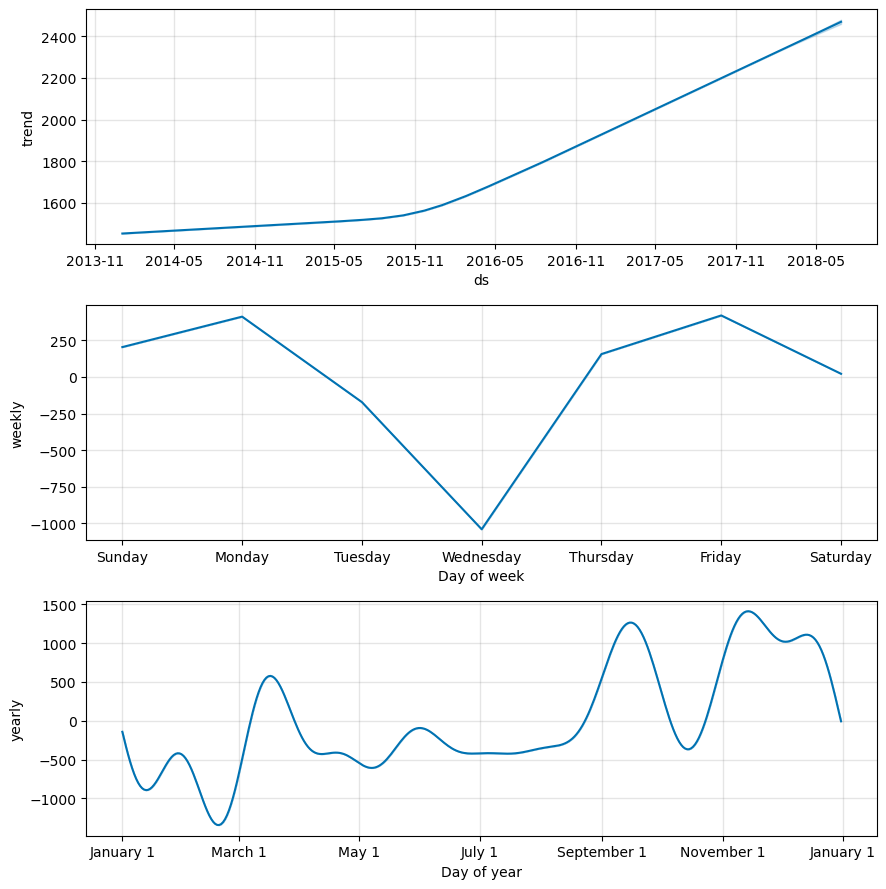

In [15]:
fig2=model.plot_components(forecast)
plt.show()

# XGBoost with lag features

In [17]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
   - -------------------------------------- 2.1/56.8 MB 7.3 MB/s eta 0:00:08
   -- ------------------------------------- 3.9/56.8 MB 8.7 MB/s eta 0:00:07
   ---- ----------------------------------- 5.8/56.8 MB 8.6 MB/s eta 0:00:06
   ---- ----------------------------------- 6.6/56.8 MB 7.9 MB/s eta 0:00:07
   ----- ---------------------------------- 7.3/56.8 MB 6.8 MB/s eta 0:00:08
   ----- ---------------------------------- 7.6/56.8 MB 6.0 MB/s eta 0:00:09
   ----- ---------------------------------- 7.9/56.8 MB 5.2 MB/s eta 0:00:10
   ----- ---------------------------------- 8.4/56.8 MB 4.8 MB/s eta 0:00:11
   ------ --------------------------------- 8.7/56.8 MB 4.6 MB/s eta 0:00:11
   ------ --------------------------------- 9.2/56.8 MB 4.2 MB/s eta 0:00:12
   ------ --------------------------------- 9.4/56.8 MB 4.1 MB/s eta 0:00:12
   ------- --

In [18]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

In [19]:
ts['lag1']=ts['y'].shift(1)
ts['lag7']=ts['y'].shift(7)

In [20]:
train=ts.iloc[:-180]
test=ts.iloc[-180:]

In [22]:
X_train,y_train=train[['lag1','lag7']],train['y']
X_test,y_test=test[['lag1','lag7']],test['y']

In [23]:
model=XGBRegressor(n_estimators=200,learning_rate=0.1)
model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [24]:
y_pred=model.predict(X_test)

In [25]:
print("MAE:", mean_absolute_error(y_test,y_pred))

MAE: 2172.757988037211


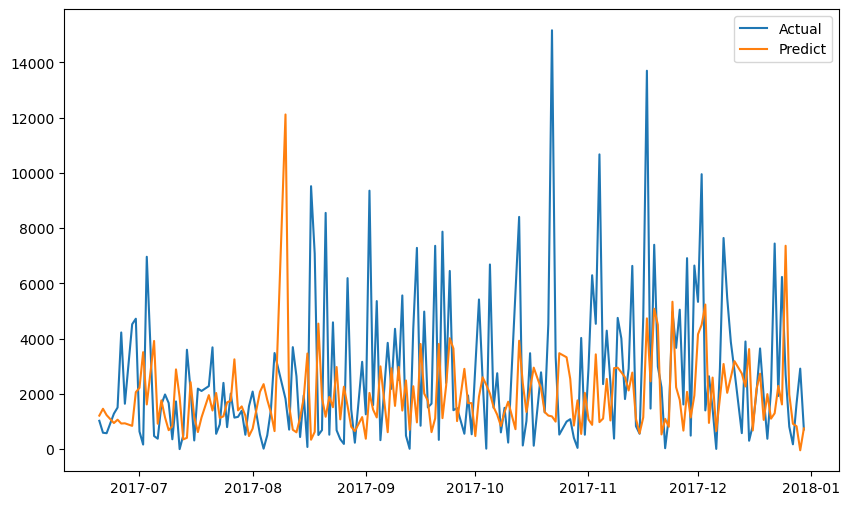

In [26]:
plt.figure(figsize=(10,6))
plt.plot(test['ds'],y_test,label="Actual")
plt.plot(test['ds'],y_pred,label="Predict")
plt.legend()
plt.show()